
# Практическая работа 3. Работа с API. Тестовые наборы данных Kaggle API
Практическая работа 3. Работа с API. Тестовые наборы данных Kaggle API

**Задание**

3.1. Спроектировать верхнеуровневую архитектуру аналитического решения в `draw.io`. Необходимо использовать:

- Source Layer - слой источников данных.
- Storage Layer - слой хранения данных.
- Business Layer - слой для доступа к данным бизнес пользователей.

3.2. Получить ключ Kaggle API.

3.3. Настроить среду.

3.4. Провести поиск наборов данных в Kaggle по ключевому слову. Выполнить анализ данных датасета Kuggle, обновленный в `2023-2024` годах.

3.5. Провести анализ датасета на пустые значения. Очистить данные от нулевых и пустых значений. Выбрать только те данные, которые можно в дальнейщем анализировать(числовые характеристики, бинарные и т.д.).

3.6. Получить качественный датасет. Выгрузить его в формате `clear.csv`.

3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например `Apache Superset`.

Результаты практической работы представить в виде файла `ФИО.ipynb`, `clear.csv`.


Дополнительная информация по работе с [Kaggle API](https://github.com/Kaggle/kaggle-api)

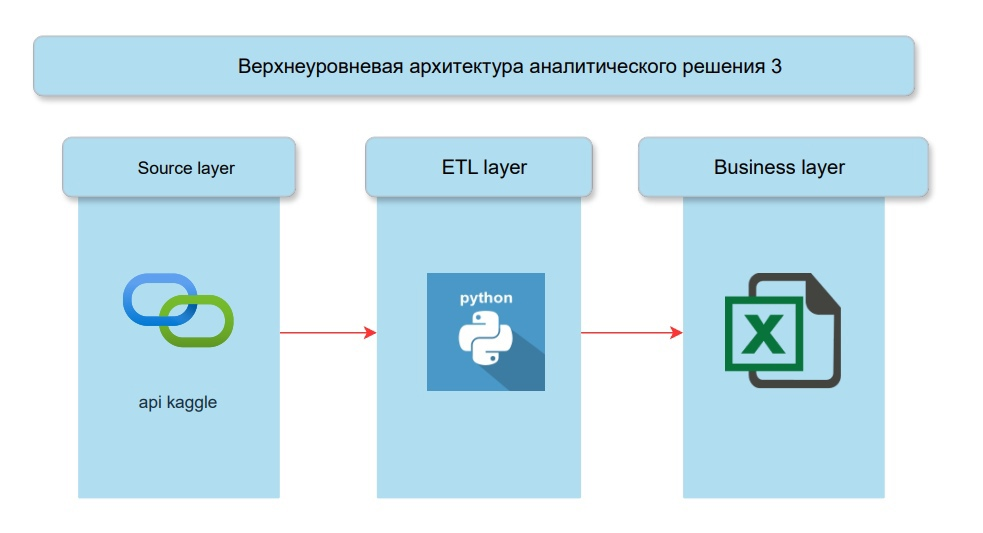

1. **Создайте ключ `API` в `Kaggle`**.

Моя учетная запись -> Settings-> API -> Создать новые токены API.

На ваш компьютер будет загружен файл `kaggle.json`. Вы можете загрузить на `Google` Диск вручную или использовать для загрузки приведенный ниже скрипт.

Если вы хотите использовать скрипт для загрузки файла `kaggle.json`, используйте следующий фрагмент в ячейке кода:

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alinaolifir","key":"394138ae5d718504e2d4664262ae9e6e"}'}

Установите `Kaggle API`, используя

In [14]:
!pip install -q kaggle

Переместите файл `kaggle.json` в **~/.kaggle**, где клиент `API` ожидает расположения вашего токена:

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Предоставьте разрешения на изменение, чтобы избежать предупреждения при запуске инструмента `Kaggle`.

In [16]:
!chmod 600 ~/.kaggle/kaggle.json

Теперь можно получить доступ к наборам данных с помощью клиента

In [17]:
!kaggle datasets list

ref                                                     title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
syedanwarafridi/vehicle-sales-data                      Vehicle Sales Data                             19MB  2024-02-21 20:16:17           4429         73  1.0              
nelgiriyewithana/apple-quality                          Apple Quality                                 170KB  2024-01-11 14:31:07          23965        518  1.0              
kanchana1990/spotifys-long-hits-2014-2024               Spotify's Long Hits (2014-2024) 🎶              38KB  2024-02-23 12:39:02           1682         44  1.0              
xontoloyo/data-penjualan-zara                           ZARA Sales                                     17KB  2024-02-27 05:37:53  

In [18]:
import kaggle

# List of all datasets available on Kaggle
kaggle.api.dataset_list()

[syedanwarafridi/vehicle-sales-data,
 nelgiriyewithana/apple-quality,
 kanchana1990/spotifys-long-hits-2014-2024,
 xontoloyo/data-penjualan-zara,
 tarunrm09/climate-change-indicators,
 willianoliveiragibin/drug-overdose-death,
 mikhail1681/walmart-sales,
 dhavalpatel555/us-stock-market-2020-to-2024,
 harshitstark/covid-19-global-statistics-dataset,
 nelgiriyewithana/emotions,
 mikhail1681/mcdonalds-financial-statements-2002-2022,
 kapoorprakhar/college-placement-dataset,
 dansbecker/melbourne-housing-snapshot,
 mustafabayar/europe-sales-records,
 willianoliveiragibin/alcohol-consumption,
 imyjoshua/average-time-spent-by-a-user-on-social-media,
 kanchana1990/2024s-most-watched-youtube-videos,
 kanchana1990/best-buy-2024-windows-laptops,
 hemanthpingali/adult-census-dataset,
 aadharshviswanath/flight-data]

In [19]:
# поиск наборов данных в Kaggle о ""ключевое слово"""
datasets = kaggle.api.datasets_list(search="STYLE & BEAUTY.")

print(datasets)

[{'subtitleNullable': 'Identify the type of news based on headlines and short descriptions', 'creatorNameNullable': 'Rishabh Misra', 'creatorUrlNullable': 'rmisra', 'totalBytesNullable': 27829769, 'urlNullable': 'https://www.kaggle.com/datasets/rmisra/news-category-dataset', 'licenseNameNullable': 'Attribution 4.0 International (CC BY 4.0)', 'descriptionNullable': None, 'ownerNameNullable': 'Rishabh Misra', 'ownerRefNullable': 'rmisra', 'titleNullable': 'News Category Dataset', 'currentVersionNumberNullable': 3, 'usabilityRatingNullable': 1.0, 'id': 32526, 'ref': 'rmisra/news-category-dataset', 'subtitle': 'Identify the type of news based on headlines and short descriptions', 'hasSubtitle': True, 'creatorName': 'Rishabh Misra', 'hasCreatorName': True, 'creatorUrl': 'rmisra', 'hasCreatorUrl': True, 'totalBytes': 27829769, 'hasTotalBytes': True, 'url': 'https://www.kaggle.com/datasets/rmisra/news-category-dataset', 'hasUrl': True, 'lastUpdated': '2022-09-24T08:07:21.593Z', 'downloadCount

In [20]:
!kaggle datasets list -s "STYLE & BEAUTY."

ref                                                     title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rmisra/news-category-dataset                            News Category Dataset                               27MB  2022-09-24 08:07:21          61313        718  1.0              
setseries/news-category-dataset                         News Category Dataset                                6MB  2021-10-22 14:38:19           1029         18  1.0              
jilkothari/lifestyle-courses-udemy-39k-course           LifeStyle Courses - Udemy (39K+ course)              3MB  2020-11-02 05:39:57            360         11  1.0              
faiqueali/cosmetics-images                              Style Spectrum                                   

In [21]:
!pip install pandas
import pandas as pd

In [22]:
datasets = kaggle.api.datasets_list(search="STYLE & BEAUTY.")
df1=pd.DataFrame(datasets)
pd.DataFrame(datasets)

,subtitleNullable,creatorNameNullable,creatorUrlNullable,totalBytesNullable,urlNullable,licenseNameNullable,descriptionNullable,ownerNameNullable,ownerRefNullable,titleNullable,...,topicCount,viewCount,voteCount,currentVersionNumber,hasCurrentVersionNumber,usabilityRating,hasUsabilityRating,tags,files,versions
0,Identify the type of news based on headlines a...,Rishabh Misra,rmisra,27829769,https://www.kaggle.com/datasets/rmisra/news-ca...,Attribution 4.0 International (CC BY 4.0),None,Rishabh Misra,rmisra,News Category Dataset,...,0,413808,718,3,True,1.000000,True,"[{'nameNullable': 'linguistics', 'descriptionN...",[],[]
1,Identify news based on headlines and description,Codify,setseries,6111343,https://www.kaggle.com/datasets/setseries/news...,CC0: Public Domain,None,Codify,setseries,News Category Dataset,...,0,7862,18,2,True,1.000000,True,"[{'nameNullable': 'beginner', 'descriptionNull...",[],[]
2,39 thousand educational courses in Finance & A...,JIL KOTHARI,jilkothari,2899369,https://www.kaggle.com/datasets/jilkothari/lif...,CC0: Public Domain,None,JIL KOTHARI,jilkothari,LifeStyle Courses - Udemy (39K+ course),...,0,3905,11,1,True,1.000000,True,"[{'nameNullable': 'education', 'descriptionNul...",[],[]
3,Discover a World of Beauty and Fashion,Faique Ali,faiqueali,10570603,https://www.kaggle.com/datasets/faiqueali/cosm...,MIT,None,Faique Ali,faiqueali,Style Spectrum,...,0,213,3,2,True,0.812500,True,"[{'nameNullable': 'clothing and accessories', ...",[],[]
4,"30,000+ User-Submitted Reviews",The Devastator,thedevastator,260319,https://www.kaggle.com/datasets/thedevastator/...,Other (specified in description),None,The Devastator,thedevastator,iPhone Reviews from Amazon.com,...,0,8865,31,2,True,1.000000,True,"[{'nameNullable': 'clothing and accessories', ...",[],[]
5,Embark on a Journey of Diverse Artistic Visions,CYANEX 1702,cyanex1702,2330925814,https://www.kaggle.com/datasets/cyanex1702/sur...,CC BY-SA 4.0,None,CYANEX 1702,cyanex1702,Surreal Symphonies (A Dataset Of Diverse Art),...,0,660,10,1,True,0.687500,True,"[{'nameNullable': 'music', 'descriptionNullabl...",[],[]
6,Butterfly images and information from the Smit...,The Devastator,thedevastator,327610413,https://www.kaggle.com/datasets/thedevastator/...,CC0: Public Domain,None,The Devastator,thedevastator,Smithsonian Butterfly Dataset,...,0,1161,12,2,True,1.000000,True,"[{'nameNullable': 'biology', 'descriptionNulla...",[],[]
7,,prabbit267,prabbit267,109492328,https://www.kaggle.com/datasets/ppprabbit/imag...,Unknown,None,theP,ppprabbit,image_style_log_output,...,0,1062,0,3,True,0.117647,True,[],[],[]
8,,Katherine Jackson,florencechung,72235,https://www.kaggle.com/datasets/florencechung/...,Unknown,None,Katherine Jackson,florencechung,Unlocking Your Creativity: Strategies for Writing,...,0,312,1,1,True,0.312500,True,[],[],[]
9,,Tanhy-ML,tanhyml,20792236867,https://www.kaggle.com/datasets/tanhyml/pexels...,Unknown,None,Tanhy-ML,tanhyml,Pexels-Dataset2,...,0,280,0,1,True,0.187500,True,[],[],[]


In [23]:
df1.to_excel("STYLE & BEAUTY.xlsx", sheet_name='STYLE & BEAUTY')

In [24]:
from google.colab import files
files.download('STYLE & BEAUTY.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Изучим датасет **iPhone Reviews from Amazon.com**


Download Dataset.

In [25]:
!kaggle datasets download -d thedevastator/apple-iphone-11-reviews-from-amazon-com

  0% 0.00/254k [00:00<?, ?B/s]
100% 254k/254k [00:00<00:00, 76.1MB/s]


In [26]:
import zipfile

with zipfile.ZipFile("apple-iphone-11-reviews-from-amazon-com.zip","r") as zip_ref:

    # extracting content in the zipfile
    zip_ref.extractall()



In [27]:
!ls

 apple_iphone_11_reviews.csv		       kaggle.json  'STYLE & BEAUTY.xlsx'
 apple-iphone-11-reviews-from-amazon-com.zip   sample_data


In [28]:
# reading the contents
df = pd.read_csv("apple_iphone_11_reviews.csv")

# printing first 6 raws of the dataframe
df.head(100)

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Apple iPhone XR (64GB) - Black,3 people found this helpful,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-09-29,Camera superb,5.0 out of 5 stars,Apple,Amazon Customer,"In this price of 45000, its the best choice fo..."
96,96,Apple iPhone XR (64GB) - Black,One person found this helpful,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-10-20,I bought this iPhone XR from October Amazon Gr...,5.0 out of 5 stars,Apple,Ankan Pal,Awesome iPhone
97,97,Apple iPhone XR (64GB) - Black,2 people found this helpful,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-08-16,Nothing can beat iPhone. This is my fourth pho...,5.0 out of 5 stars,Apple,Swamy,Excellent Phone
98,98,Apple iPhone XR (64GB) - Black,3 people found this helpful,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-08-01,I was bit worried about the authenticity of bu...,5.0 out of 5 stars,Apple,Ranjit,Original iphone


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5010 entries, 0 to 5009
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            5010 non-null   int64 
 1   product          5010 non-null   object
 2   helpful_count    5010 non-null   object
 3   total_comments   5010 non-null   int64 
 4   url              5010 non-null   object
 5   review_country   5010 non-null   object
 6   reviewed_at      5010 non-null   object
 7   review_text      5007 non-null   object
 8   review_rating    5010 non-null   object
 9   product_company  5010 non-null   object
 10  profile_name     5010 non-null   object
 11  review_title     5008 non-null   object
dtypes: int64(2), object(10)
memory usage: 469.8+ KB


In [30]:
df.isnull().values.any()

True

In [31]:
df.isnull().sum()

index              0
product            0
helpful_count      0
total_comments     0
url                0
review_country     0
reviewed_at        0
review_text        3
review_rating      0
product_company    0
profile_name       0
review_title       2
dtype: int64

In [32]:
df.isnull().sum().sum()

5

In [33]:
df2 = df.dropna()
df2

,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title
0,0,Apple iPhone XR (64GB) - Black,"5,087 people found this helpful",24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0 out of 5 stars,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X..."
1,1,Apple iPhone XR (64GB) - Black,"2,822 people found this helpful",6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0 out of 5 stars,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.
2,2,Apple iPhone XR (64GB) - Black,"1,798 people found this helpful",0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0 out of 5 stars,Apple,A,Happy with the purchase
3,3,Apple iPhone XR (64GB) - Black,"1,366 people found this helpful",14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0 out of 5 stars,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...
4,4,Apple iPhone XR (64GB) - Black,536 people found this helpful,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0 out of 5 stars,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI
...,...,...,...,...,...,...,...,...,...,...,...,...
5005,5005,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-13,Dhamaka,4.0 out of 5 stars,Apple,Shreya,Dhamaka phone
5006,5006,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-15,Goodbye,4.0 out of 5 stars,Apple,murali hv,Good
5007,5007,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-12-29,Nothing,5.0 out of 5 stars,Apple,Manish,Fantabulous phone. Easy to use.
5008,5008,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-10,Superbb,5.0 out of 5 stars,Apple,basil john p,Fantastic


In [34]:
df2.isnull().values.any()

False

Пустые значения удалены, можно преобразовать данные для визуализации



In [53]:
import pandas as pd
import re

df2['helpful_count'] = df2['helpful_count'].apply(lambda x: re.sub(r'\D', '', x))
df2['review_rating'] = df2['review_rating'].apply(lambda x: re.sub(r'(\d+\.\d+).*', r'\1', x))
df2

<ipython-input-53-5096637cc6b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['helpful_count'] = df2['helpful_count'].apply(lambda x: re.sub(r'\D', '', x))
<ipython-input-53-5096637cc6b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['review_rating'] = df2['review_rating'].apply(lambda x: re.sub(r'(\d+\.\d+).*', r'\1', x))


,index,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,numbers_only,it_helps,rating
0,0,Apple iPhone XR (64GB) - Black,5087,24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",5087,5087,3.0
1,1,Apple iPhone XR (64GB) - Black,2822,6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,2822,2822,1.0
2,2,Apple iPhone XR (64GB) - Black,1798,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0,Apple,A,Happy with the purchase,1798,1798,5.0
3,3,Apple iPhone XR (64GB) - Black,1366,14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1366,1366,1.0
4,4,Apple iPhone XR (64GB) - Black,536,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,536,536,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,5005,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-13,Dhamaka,4.0,Apple,Shreya,Dhamaka phone,0,0,4.0
5006,5006,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-15,Goodbye,4.0,Apple,murali hv,Good,0,0,4.0
5007,5007,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-12-29,Nothing,5.0,Apple,Manish,Fantabulous phone. Easy to use.,0,0,5.0
5008,5008,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-10,Superbb,5.0,Apple,basil john p,Fantastic,0,0,5.0


In [54]:
df3 = df2.drop(columns=['index'])
df3

,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,numbers_only,it_helps,rating
0,Apple iPhone XR (64GB) - Black,5087,24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",5087,5087,3.0
1,Apple iPhone XR (64GB) - Black,2822,6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,2822,2822,1.0
2,Apple iPhone XR (64GB) - Black,1798,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0,Apple,A,Happy with the purchase,1798,1798,5.0
3,Apple iPhone XR (64GB) - Black,1366,14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1366,1366,1.0
4,Apple iPhone XR (64GB) - Black,536,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,536,536,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-13,Dhamaka,4.0,Apple,Shreya,Dhamaka phone,0,0,4.0
5006,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-15,Goodbye,4.0,Apple,murali hv,Good,0,0,4.0
5007,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-12-29,Nothing,5.0,Apple,Manish,Fantabulous phone. Easy to use.,0,0,5.0
5008,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-10,Superbb,5.0,Apple,basil john p,Fantastic,0,0,5.0


In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5007 entries, 0 to 5009
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product          5007 non-null   object
 1   helpful_count    5007 non-null   object
 2   total_comments   5007 non-null   int64 
 3   url              5007 non-null   object
 4   review_country   5007 non-null   object
 5   reviewed_at      5007 non-null   object
 6   review_text      5007 non-null   object
 7   review_rating    5007 non-null   object
 8   product_company  5007 non-null   object
 9   profile_name     5007 non-null   object
 10  review_title     5007 non-null   object
 11  numbers_only     5007 non-null   object
 12  it_helps         5007 non-null   object
 13  rating           5007 non-null   object
dtypes: int64(1), object(13)
memory usage: 586.8+ KB


In [60]:
# Заполнение пустых значений в столбце 'helpful_count' нулевым значением
df3['helpful_count'] = df3['helpful_count'].replace('', '0')

# Изменение типа столбца 'helpful_count' на целочисленный
df3['helpful_count'] = df3['helpful_count'].astype(int)
df3['total_comments'] = df3['total_comments'].astype(int)
df3['reviewed_at'] = pd.to_datetime(df3['reviewed_at'])
# Изменение типа столбца 'review_rating' на вещественный
df3['review_rating'] = df3['review_rating'].astype(float)
df3

,product,helpful_count,total_comments,url,review_country,reviewed_at,review_text,review_rating,product_company,profile_name,review_title,numbers_only,it_helps,rating
0,Apple iPhone XR (64GB) - Black,5087,24,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-12-12,NOTE:,3.0,Apple,Sameer Patil,"Which iPhone you should Purchase ? iPhone 8, X...",5087,5087,3.0
1,Apple iPhone XR (64GB) - Black,2822,6,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2018-11-17,Very bad experience with this iPhone xr phone....,1.0,Apple,Amazon Customer,Don't buy iPhone xr from Amazon.,2822,2822,1.0
2,Apple iPhone XR (64GB) - Black,1798,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-01-27,Amazing phone with amazing camera coming from ...,5.0,Apple,A,Happy with the purchase,1798,1798,5.0
3,Apple iPhone XR (64GB) - Black,1366,14,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-02,So I got the iPhone XR just today. The product...,1.0,Apple,Shubham Dutta,Amazon is not an apple authorised reseller. Pl...,1366,1366,1.0
4,Apple iPhone XR (64GB) - Black,536,5,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-05-24,I've been an android user all my life until I ...,5.0,Apple,Nepuni Lokho,Excellent Battery life and buttery smooth UI,536,536,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-13,Dhamaka,4.0,Apple,Shreya,Dhamaka phone,0,0,4.0
5006,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-15,Goodbye,4.0,Apple,murali hv,Good,0,0,4.0
5007,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-12-29,Nothing,5.0,Apple,Manish,Fantabulous phone. Easy to use.,0,0,5.0
5008,Apple iPhone XR (64GB) - Black,0,0,https://www.amazon.in/Apple-iPhone-XR-64GB-Bla...,India,2019-11-10,Superbb,5.0,Apple,basil john p,Fantastic,0,0,5.0


In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5007 entries, 0 to 5009
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   product          5007 non-null   object        
 1   helpful_count    5007 non-null   int64         
 2   total_comments   5007 non-null   int64         
 3   url              5007 non-null   object        
 4   review_country   5007 non-null   object        
 5   reviewed_at      5007 non-null   datetime64[ns]
 6   review_text      5007 non-null   object        
 7   review_rating    5007 non-null   float64       
 8   product_company  5007 non-null   object        
 9   profile_name     5007 non-null   object        
 10  review_title     5007 non-null   object        
 11  numbers_only     5007 non-null   object        
 12  it_helps         5007 non-null   object        
 13  rating           5007 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(

In [62]:
df3.to_excel("apple.xlsx", sheet_name='apple')
from google.colab import files
files.download('apple.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:
df3.to_csv("apple.csv")
from google.colab import files
files.download('apple.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Самостоятельная работа


3.1. Спроектировать верхнеуровневую архитектуру аналитического решения в `draw.io`. Необходимо использовать:

- Source Layer - слой источников данных.
- Storage Layer - слой хранения данных.
- Business Layer - слой для доступа к данным бизнес пользователей.

3.2. Получить ключ Kaggle API.

3.3. Настроить среду.

3.4. Провести поиск наборов данных в Kaggle по ключевому слову. Выполнить анализ данных датасета Kuggle, обновленный в `2023-2024` годах.

3.5. Провести анализ датасета на пустые значения. Очистить данные от нулевых и пустых значений. Выбрать только те данные, которые можно в дальнейщем анализировать(числовые характеристики, бинарные и т.д.).

3.6. Получить качественный датасет. Выгрузить его в формате `clear.csv`.

3.7. Реализовать визуализацию полученных метрик в отечественной BI-системе или в аналитических панелях с открытым исходным кодом, например `Apache Superset`.

Результаты практической работы представить в виде файла `ФИО.ipynb`, `clear.csv`.

**Вариант**.

`1-11` поиск ведем по ключевым словам,

вариант `12-35` - по названию Датасета.

`Ключевые слова`:

1. ENTERTAINMENT.
2. TRAVEL.
3. STYLE & BEAUTY.
4. PARENTING.
5. HEALTHY LIVING.
6. FOOD & DRINK.
7. BUSINESS.
8. COMEDY.
9. SPORTS.
10. HOME & LIVING.
11. PARENTS.

`ДАТАСЕТ`:

12. Credit Card Fraud Detection.
13. European Soccer Database.
14. Avocado Prices.
15. IBM HR Analytics Employee Attrition & Performance.
16. Medical Cost Personal Datasets.
17. Open Food Facts.
18. Machine Learning & Data Science Survey.
19. Survival Rate of Russian Companies.
20. Yandex: Geo Reviews Dataset 2023.
21. Yandex Music TOP 100 songs.
22. HeadHunter vacancies.
23. Russian Marketplace Reviews E-Commerce Dataset.
24. world economic.
25. credit card transicts.